<a href="https://colab.research.google.com/github/harsh-sengar/Cyber-Security-CS631/blob/main/TE_Dataset_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
cd /content/gdrive/MyDrive/Group Project/TE-data/data

/content/gdrive/MyDrive/Group Project/TE-data/data


In [16]:
import pandas as pd
df1 = pd.read_csv('1SA1xmv9_hundred_data_1.csv', header=None)
df1.columns = ["S"+str(i) for i in range(1, len(df1.columns)+1)]

df2 = pd.read_csv('2SA2xmv6_twentyeight_data_1.csv', header=None)
df2.columns = ["S"+str(i) for i in range(1, len(df2.columns)+1)]

df3 = pd.read_csv('3SA3xmeas10_001_data_1.csv', header=None)
df3.columns = ["S"+str(i) for i in range(1, len(df3.columns)+1)]

df4 = pd.read_csv('4DA1xmv10_359_data_1.csv', header=None)
df4.columns = ["S"+str(i) for i in range(1, len(df4.columns)+1)]

df5 = pd.read_csv('5DA2xmeas7_zero_data_1.csv', header=None)
df5.columns = ["S"+str(i) for i in range(1, len(df5.columns)+1)]


In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
# Import models
from scipy import stats
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN

SA1 Results

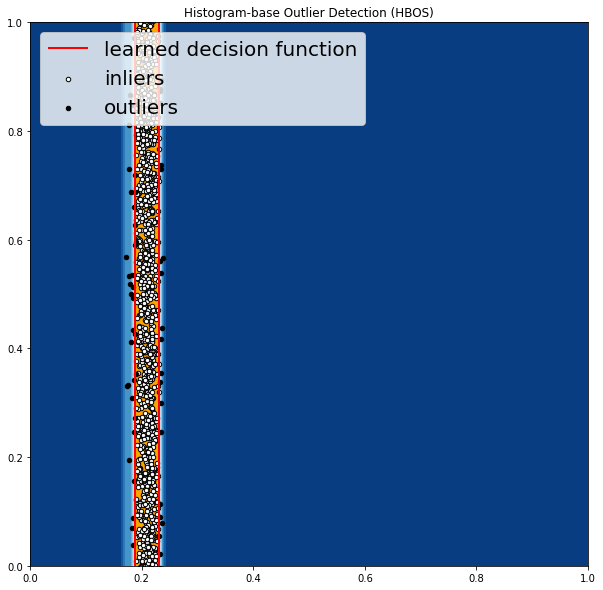

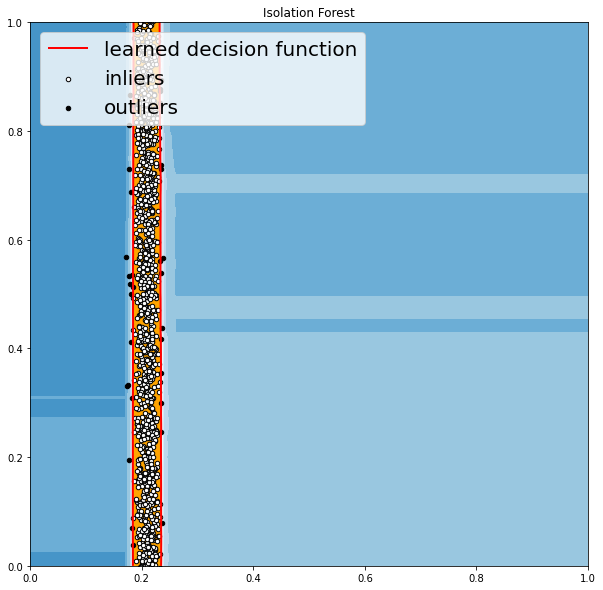

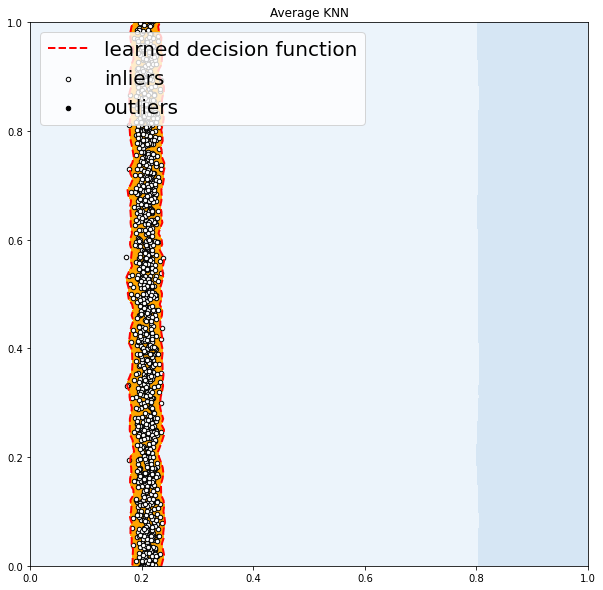

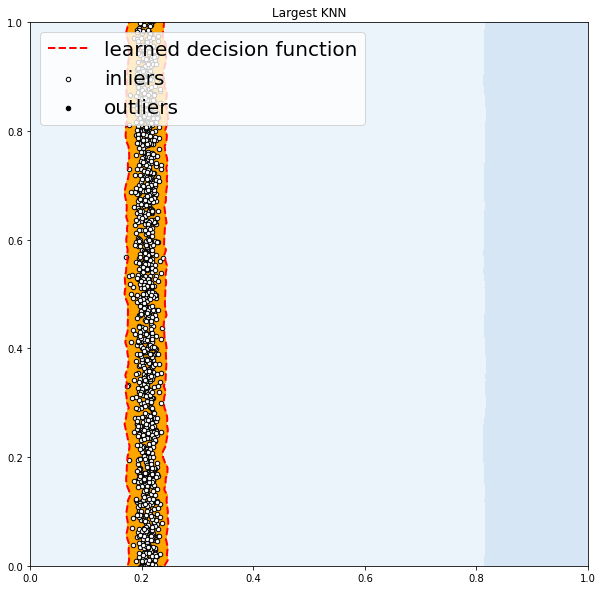

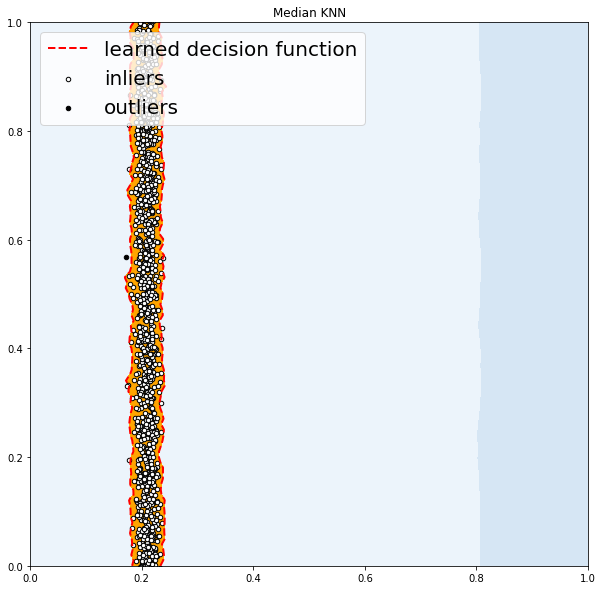

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df1)

X1 = df1['S10'].values.reshape(-1,1)
X2 = df1['S19'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

random_state = np.random.RandomState(42)
outliers_fraction = 0.166

# Define seven outlier detection tools to be compared
classifiers = {
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'Average KNN': KNN(method='mean', contamination=outliers_fraction),
        'Largest KNN': KNN(method='largest', contamination=outliers_fraction),
        'Median KNN': KNN(method='median', contamination=outliers_fraction)
}

xx , yy = np.meshgrid(np.linspace(0, 5, 500), np.linspace(0, 5, 500))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
#    plt.show()
    
    # copy of dataframe
    dfx = df1
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['S10'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['S19'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['S10'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['S19'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    #print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
            
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)
    
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    #plt.show()
    plt.savefig("output_"+str(i)+'.jpeg')

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.metrics import accuracy_score
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN

df1 = pd.read_csv('1SA1xmv9_hundred_data_1.csv', header=0)
df1.columns = ["S"+str(i) for i in range(1, len(df1.columns)+1)]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df1)

X1 = df1['S14'].values.reshape(-1, 1)
X1_train = X1[:4001]
X1_test = X1[4001:4802]

random_state = np.random.RandomState(42)
outliers_fraction = 0.166

# Define seven outlier detection tools to be compared
classifiers = {
    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction, random_state=random_state),
    'Average KNN': KNN(method='mean', contamination=outliers_fraction),
    'Largest KNN': KNN(method='largest', contamination=outliers_fraction),
    'Median KNN': KNN(method='median', contamination=outliers_fraction)
}

for i, (clf_name, clf) in enumerate(classifiers.items()):
   # clf.fit(X1)
    clf.fit(X1_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X1_train) * -1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X1_train)
   # y_pred_train = clf.predict(X1_train)
    y_pred_test = clf.predict(X1_test)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    
    # number of outliers / number of test elements
    acc = (list(y_pred_test).count(1) / y_pred_test.shape[0]) * 100
    
    print('CLASSIFIER MODEL :', clf_name, '\tACCURACY:', acc, "\n")

CLASSIFIER MODEL : Histogram-base Outlier Detection (HBOS) 	ACCURACY: 67.08385481852316 

CLASSIFIER MODEL : Isolation Forest 	ACCURACY: 69.96245306633291 

CLASSIFIER MODEL : Average KNN 	ACCURACY: 66.33291614518147 

CLASSIFIER MODEL : Largest KNN 	ACCURACY: 60.200250312891114 

CLASSIFIER MODEL : Median KNN 	ACCURACY: 60.575719649561954 



SA2 Results

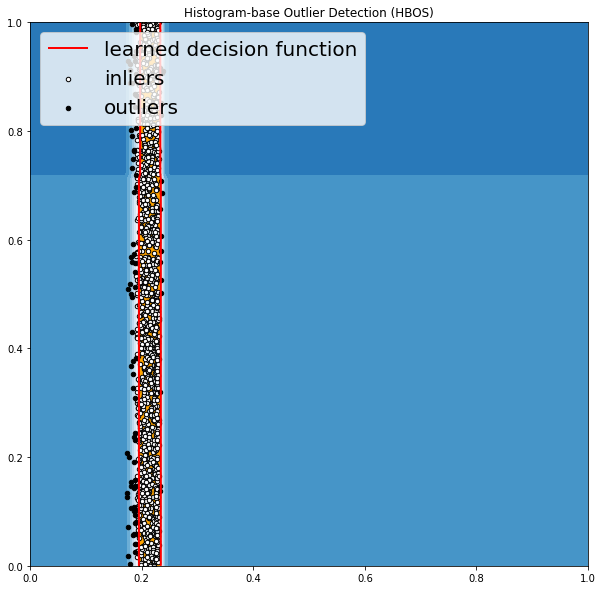

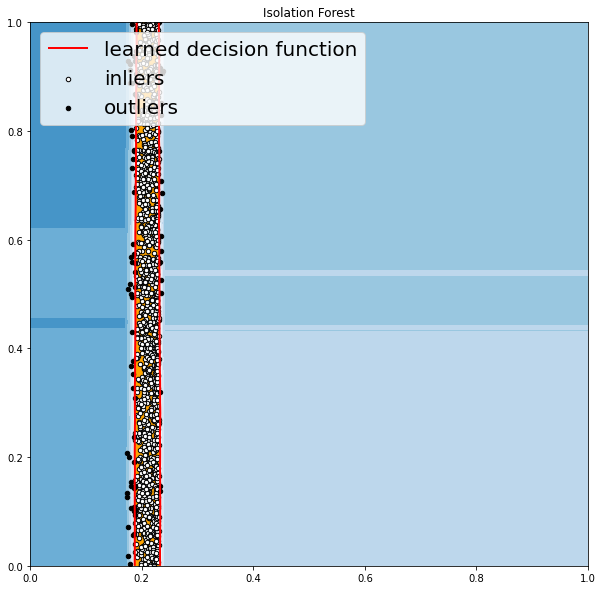

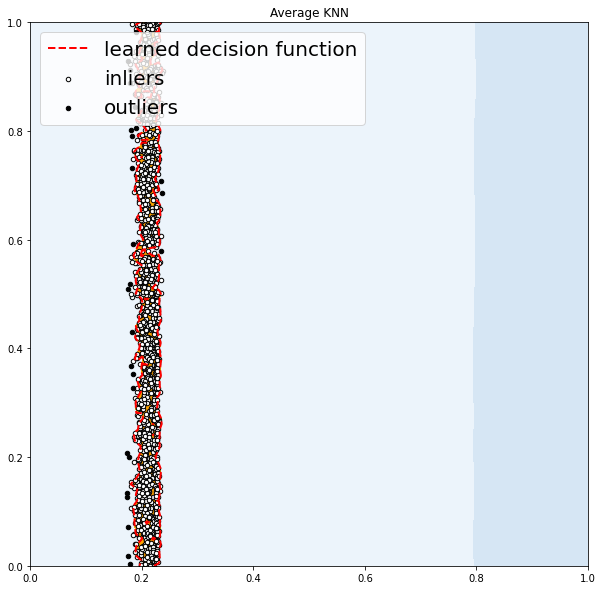

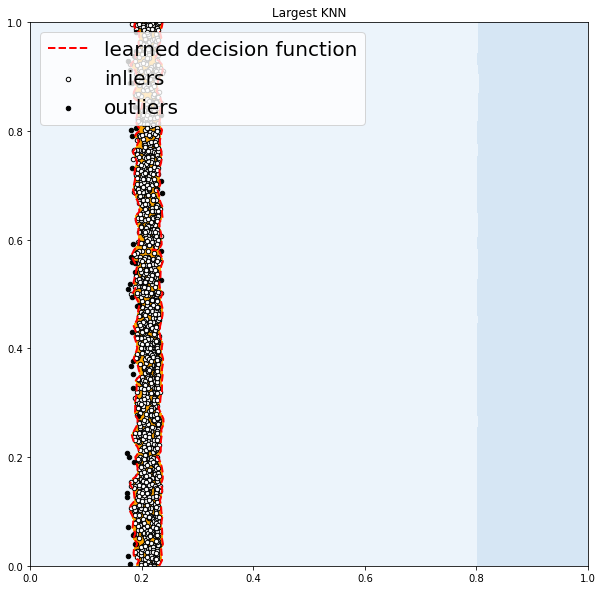

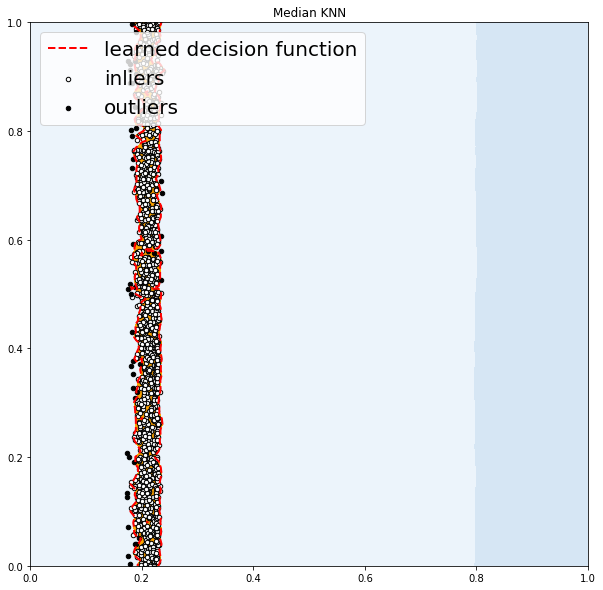

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df2)

X1 = df2['S10'].values.reshape(-1,1)
X2 = df2['S19'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

random_state = np.random.RandomState(42)
outliers_fraction = 0.166

# Define seven outlier detection tools to be compared
classifiers = {
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'Average KNN': KNN(method='mean', contamination=outliers_fraction),
        'Largest KNN': KNN(method='largest', contamination=outliers_fraction),
        'Median KNN': KNN(method='median', contamination=outliers_fraction)
}

xx , yy = np.meshgrid(np.linspace(0, 5, 500), np.linspace(0, 5, 500))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
#    plt.show()
    
    # copy of dataframe
    dfx = df2
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['S10'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['S19'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['S10'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['S19'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    #print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
            
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)
    
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    #plt.show()
    plt.savefig("SA2_output_"+str(i)+'.jpeg')

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.metrics import accuracy_score
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN

df2 = pd.read_csv('2SA2xmv6_twentyeight_data_1.csv', header=0)
df2.columns = ["S"+str(i) for i in range(1, len(df2.columns)+1)]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df2)

X1 = df2['S14'].values.reshape(-1, 1)
X1_train = X1[:4001]
X1_test = X1[4001:4802]

random_state = np.random.RandomState(42)
outliers_fraction = 0.166

# Define seven outlier detection tools to be compared
classifiers = {
    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction, random_state=random_state),
    'Average KNN': KNN(method='mean', contamination=outliers_fraction),
    'Largest KNN': KNN(method='largest', contamination=outliers_fraction),
    'Median KNN': KNN(method='median', contamination=outliers_fraction)
}

for i, (clf_name, clf) in enumerate(classifiers.items()):
   # clf.fit(X1)
    clf.fit(X1_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X1_train) * -1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X1_train)
   # y_pred_train = clf.predict(X1_train)
    y_pred_test = clf.predict(X1_test)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    
    # number of outliers / number of test elements
    acc = (list(y_pred_test).count(1) / y_pred_test.shape[0]) * 100
    
    print('CLASSIFIER MODEL :', clf_name, '\tACCURACY:', acc, "\n")

CLASSIFIER MODEL : Histogram-base Outlier Detection (HBOS) 	ACCURACY: 10.638297872340425 

CLASSIFIER MODEL : Isolation Forest 	ACCURACY: 17.146433041301627 

CLASSIFIER MODEL : Average KNN 	ACCURACY: 15.39424280350438 

CLASSIFIER MODEL : Largest KNN 	ACCURACY: 9.011264080100124 

CLASSIFIER MODEL : Median KNN 	ACCURACY: 9.637046307884855 



SA3 Results

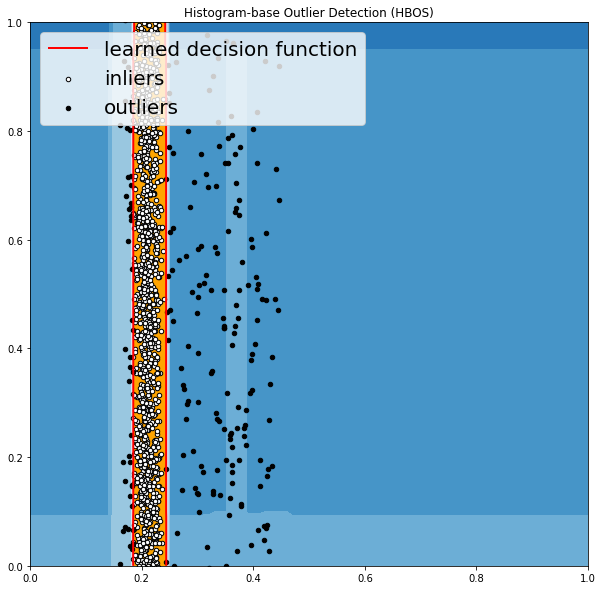

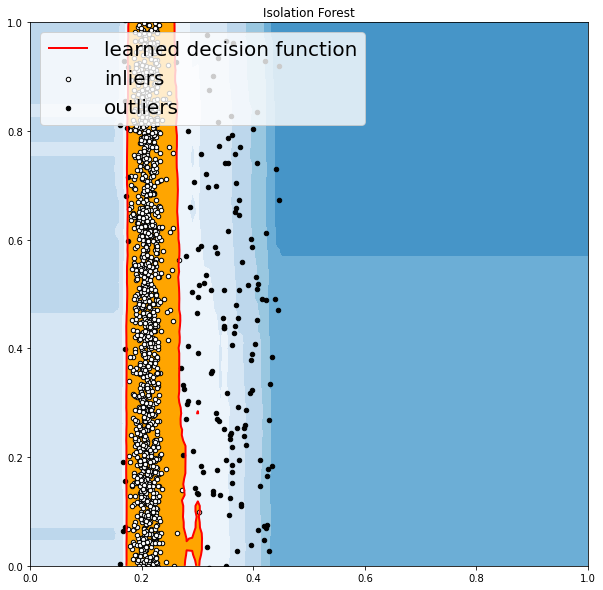

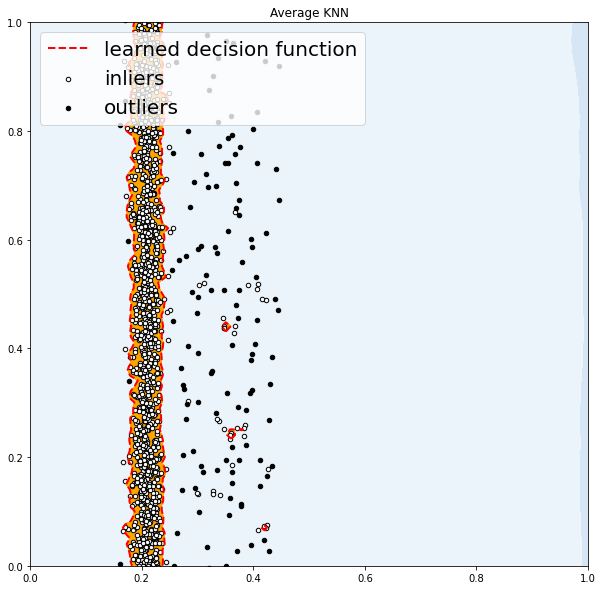

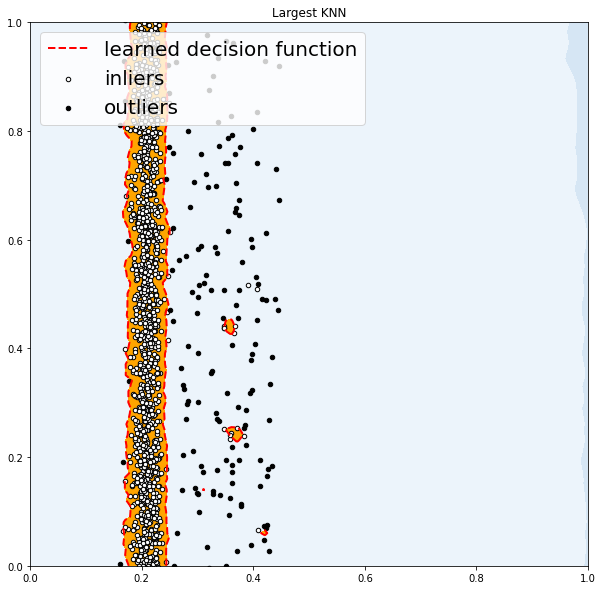

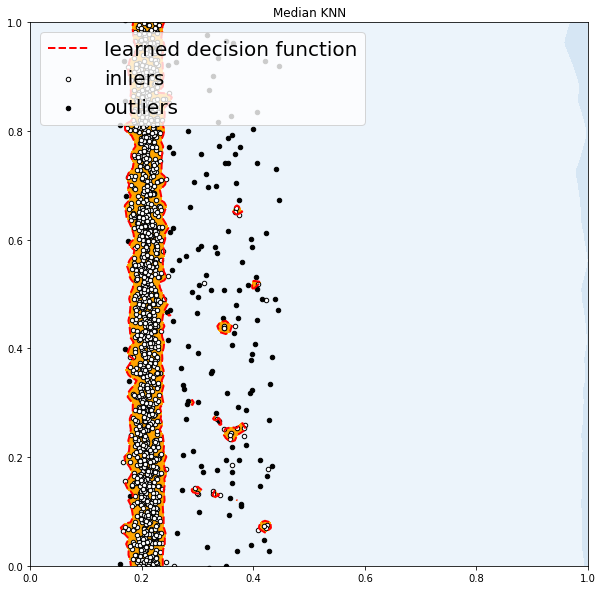

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df3)

X1 = df3['S10'].values.reshape(-1,1)
X2 = df3['S19'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

random_state = np.random.RandomState(42)
outliers_fraction = 0.166

# Define seven outlier detection tools to be compared
classifiers = {
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'Average KNN': KNN(method='mean', contamination=outliers_fraction),
        'Largest KNN': KNN(method='largest', contamination=outliers_fraction),
        'Median KNN': KNN(method='median', contamination=outliers_fraction)
}

xx , yy = np.meshgrid(np.linspace(0, 5, 500), np.linspace(0, 5, 500))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
#    plt.show()
    
    # copy of dataframe
    dfx = df3
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['S10'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['S19'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['S10'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['S19'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    #print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
            
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)
    
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    #plt.show()
    plt.savefig("SA3_output_"+str(i)+'.jpeg')

In [36]:
df3 = pd.read_csv('3SA3xmeas10_001_data_1.csv', header=None)
df3.columns = ["S"+str(i) for i in range(1, len(df3.columns)+1)]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df3)

X1 = df3['S14'].values.reshape(-1, 1)
X1_train = X1[:4001]
X1_test = X1[4001:4802]

random_state = np.random.RandomState(42)
outliers_fraction = 0.166

# Define seven outlier detection tools to be compared
classifiers = {
    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction, random_state=random_state),
    'Average KNN': KNN(method='mean', contamination=outliers_fraction),
    'Largest KNN': KNN(method='largest', contamination=outliers_fraction),
    'Median KNN': KNN(method='median', contamination=outliers_fraction)
}

for i, (clf_name, clf) in enumerate(classifiers.items()):
   # clf.fit(X1)
    clf.fit(X1_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X1_train) * -1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X1_train)
   # y_pred_train = clf.predict(X1_train)
    y_pred_test = clf.predict(X1_test)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    
    # number of outliers / number of test elements
    acc = (list(y_pred_test).count(1) / y_pred_test.shape[0]) * 100
    
    print('CLASSIFIER MODEL :', clf_name, '\tACCURACY:', acc, "\n")

CLASSIFIER MODEL : Histogram-base Outlier Detection (HBOS) 	ACCURACY: 50.625 

CLASSIFIER MODEL : Isolation Forest 	ACCURACY: 68.75 

CLASSIFIER MODEL : Average KNN 	ACCURACY: 64.25 

CLASSIFIER MODEL : Largest KNN 	ACCURACY: 53.25 

CLASSIFIER MODEL : Median KNN 	ACCURACY: 56.49999999999999 



DA1 Results

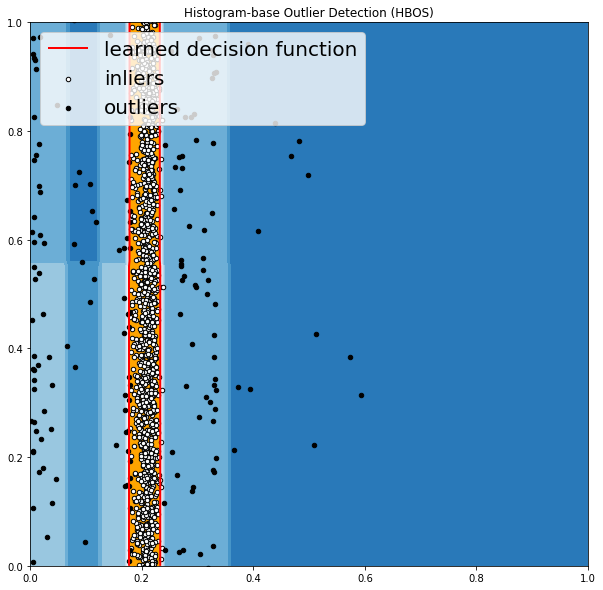

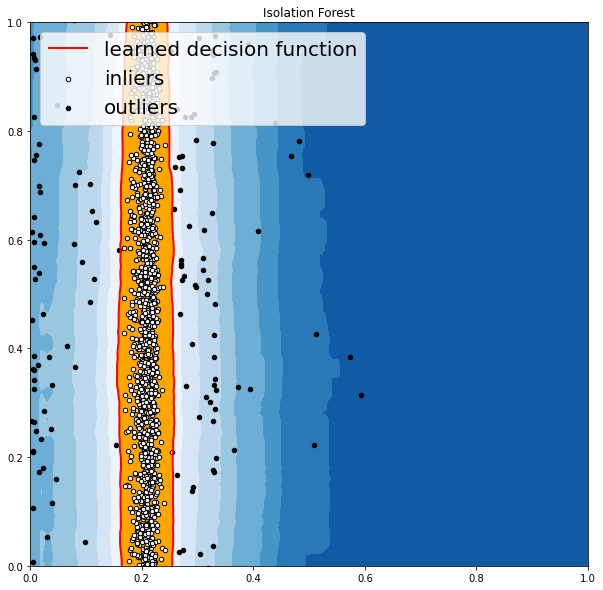

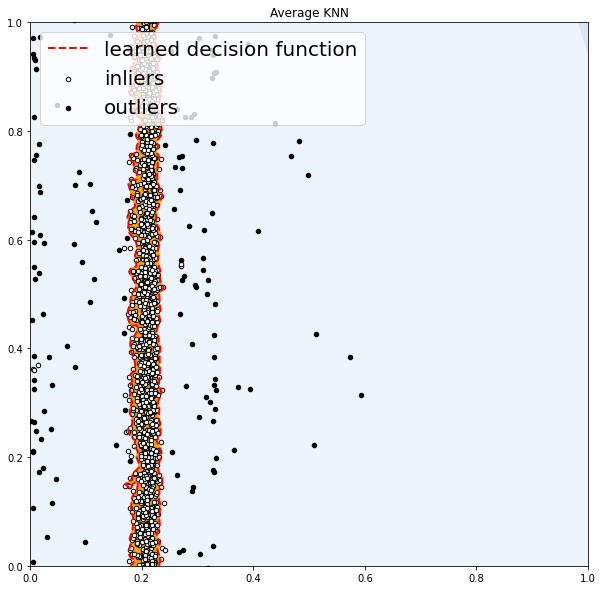

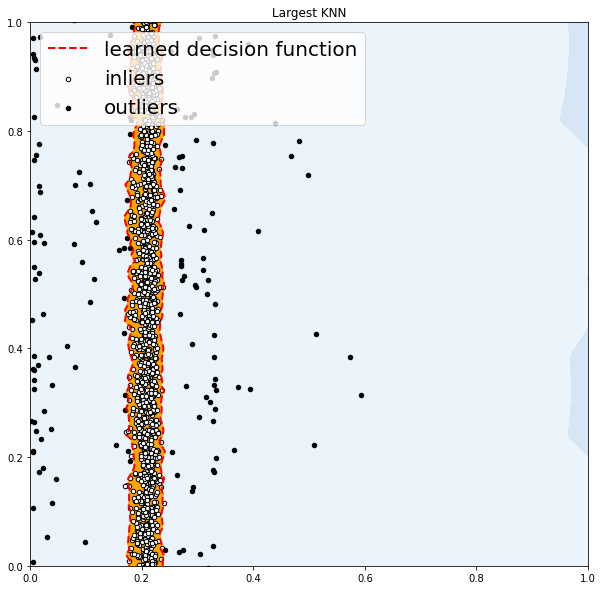

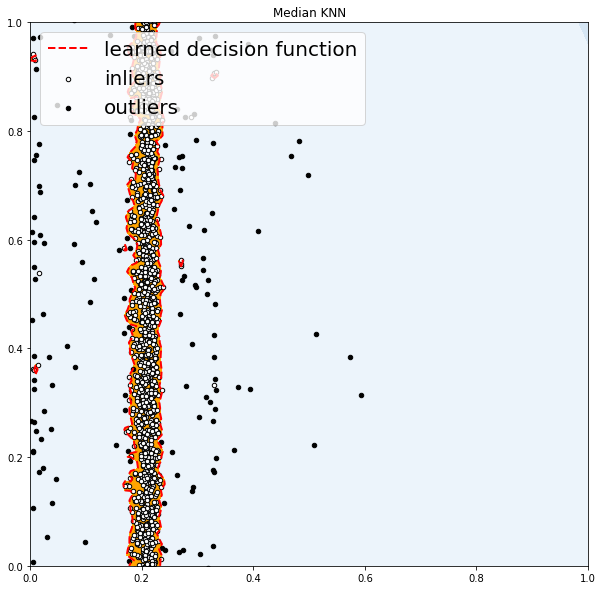

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df4)

X1 = df4['S10'].values.reshape(-1,1)
X2 = df4['S19'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

random_state = np.random.RandomState(42)
outliers_fraction = 0.166

# Define seven outlier detection tools to be compared
classifiers = {
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'Average KNN': KNN(method='mean', contamination=outliers_fraction),
        'Largest KNN': KNN(method='largest', contamination=outliers_fraction),
        'Median KNN': KNN(method='median', contamination=outliers_fraction)
}

xx , yy = np.meshgrid(np.linspace(0, 5, 500), np.linspace(0, 5, 500))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
#    plt.show()
    
    # copy of dataframe
    dfx = df4
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['S10'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['S19'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['S10'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['S19'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    #print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
            
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)
    
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    #plt.show()
    plt.savefig("SA4_output_"+str(i)+'.jpeg')

In [35]:
df4 = pd.read_csv('4DA1xmv10_359_data_1.csv', header=None)
df4.columns = ["S"+str(i) for i in range(1, len(df4.columns)+1)]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df4)

X1 = df4['S14'].values.reshape(-1, 1)
X1_train = X1[:4001]
X1_test = X1[4001:4802]

random_state = np.random.RandomState(42)
outliers_fraction = 0.166

# Define seven outlier detection tools to be compared
classifiers = {
    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction, random_state=random_state),
    'Average KNN': KNN(method='mean', contamination=outliers_fraction),
    'Largest KNN': KNN(method='largest', contamination=outliers_fraction),
    'Median KNN': KNN(method='median', contamination=outliers_fraction)
}

for i, (clf_name, clf) in enumerate(classifiers.items()):
   # clf.fit(X1)
    clf.fit(X1_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X1_train) * -1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X1_train)
   # y_pred_train = clf.predict(X1_train)
    y_pred_test = clf.predict(X1_test)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    
    # number of outliers / number of test elements
    acc = (list(y_pred_test).count(1) / y_pred_test.shape[0]) * 100
    
    print('CLASSIFIER MODEL :', clf_name, '\tACCURACY:', acc, "\n")

CLASSIFIER MODEL : Histogram-base Outlier Detection (HBOS) 	ACCURACY: 43.375 

CLASSIFIER MODEL : Isolation Forest 	ACCURACY: 49.75 

CLASSIFIER MODEL : Average KNN 	ACCURACY: 47.0 

CLASSIFIER MODEL : Largest KNN 	ACCURACY: 41.0 

CLASSIFIER MODEL : Median KNN 	ACCURACY: 43.25 



DA2 Results

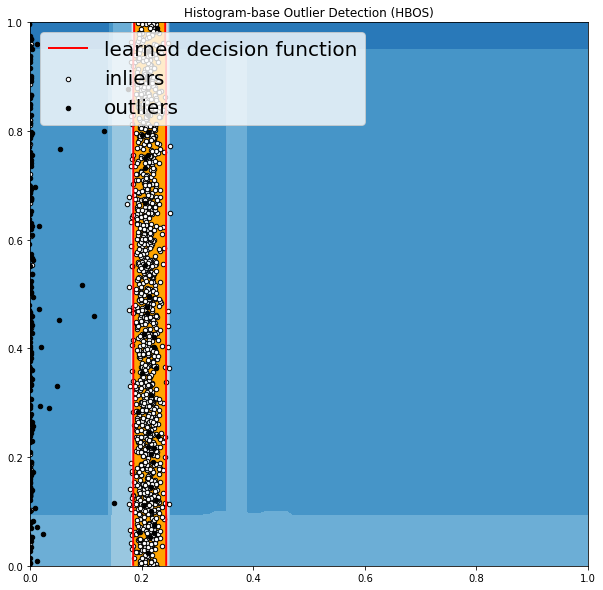

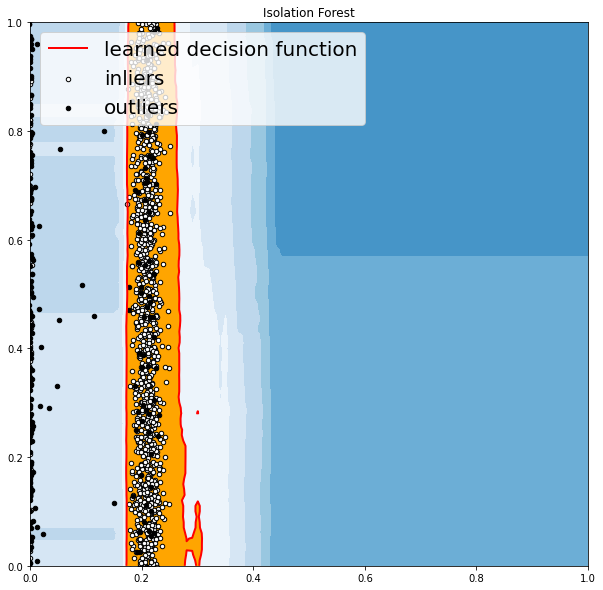

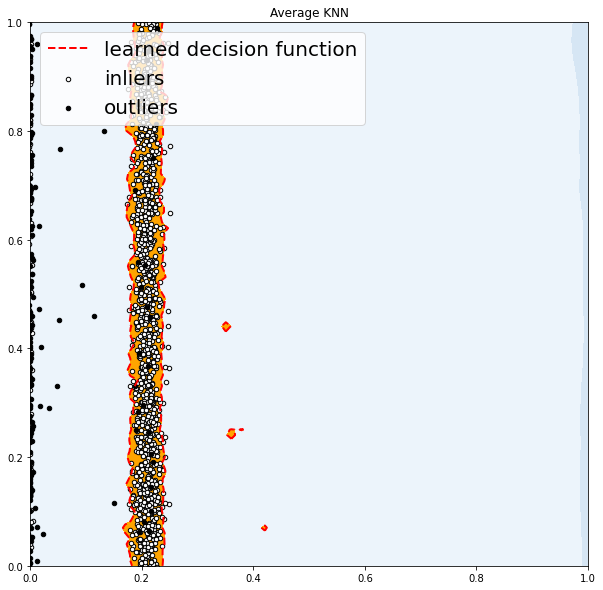

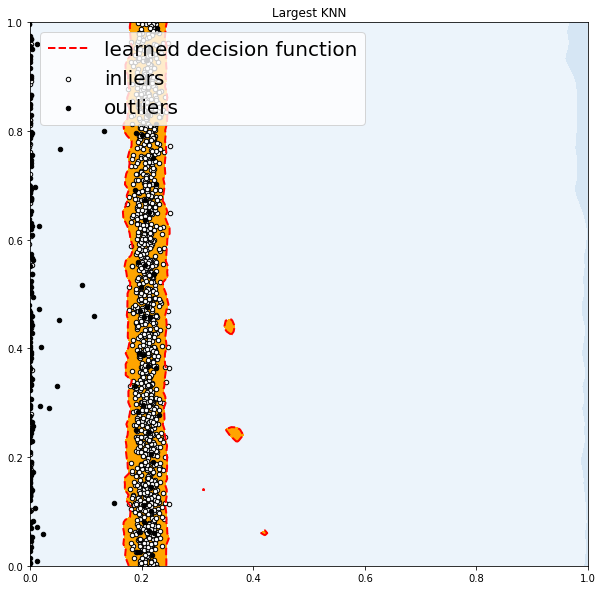

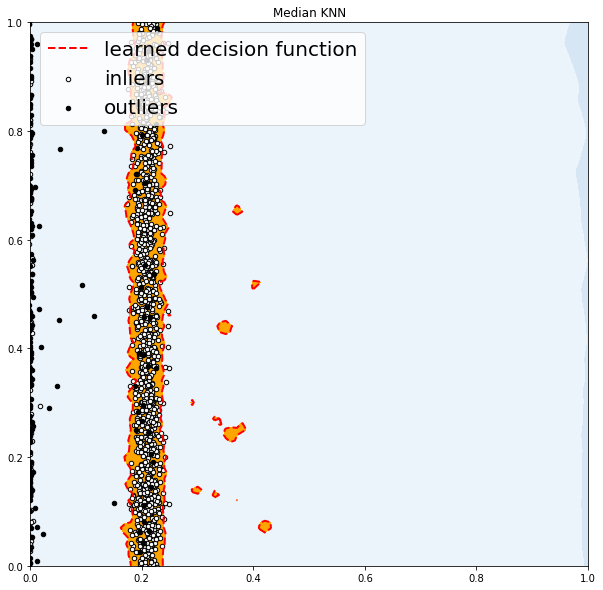

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df5)

X1 = df3['S10'].values.reshape(-1,1)
X2 = df3['S19'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

random_state = np.random.RandomState(42)
outliers_fraction = 0.166

# Define seven outlier detection tools to be compared
classifiers = {
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'Average KNN': KNN(method='mean', contamination=outliers_fraction),
        'Largest KNN': KNN(method='largest', contamination=outliers_fraction),
        'Median KNN': KNN(method='median', contamination=outliers_fraction)
}

xx , yy = np.meshgrid(np.linspace(0, 5, 500), np.linspace(0, 5, 500))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
#    plt.show()
    
    # copy of dataframe
    dfx = df5
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['S10'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['S19'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['S10'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['S19'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    #print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
            
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)
    
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    #plt.show()
    plt.savefig("SA5_output_"+str(i)+'.jpeg')

In [33]:
df5 = pd.read_csv('5DA2xmeas7_zero_data_1.csv', header=None)
df5.columns = ["S"+str(i) for i in range(1, len(df5.columns)+1)]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df5)

X1 = df5['S14'].values.reshape(-1, 1)
X1_train = X1[:4001]
X1_test = X1[4001:4802]

random_state = np.random.RandomState(42)
outliers_fraction = 0.166

# Define seven outlier detection tools to be compared
classifiers = {
    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction, random_state=random_state),
    'Average KNN': KNN(method='mean', contamination=outliers_fraction),
    'Largest KNN': KNN(method='largest', contamination=outliers_fraction),
    'Median KNN': KNN(method='median', contamination=outliers_fraction)
}

for i, (clf_name, clf) in enumerate(classifiers.items()):
   # clf.fit(X1)
    clf.fit(X1_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X1_train) * -1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X1_train)
   # y_pred_train = clf.predict(X1_train)
    y_pred_test = clf.predict(X1_test)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    
    # number of outliers / number of test elements
    acc = (list(y_pred_test).count(1) / y_pred_test.shape[0]) * 100
    
    print('CLASSIFIER MODEL :', clf_name, '\tACCURACY:', acc, "\n")

CLASSIFIER MODEL : Histogram-base Outlier Detection (HBOS) 	ACCURACY: 84.625 

CLASSIFIER MODEL : Isolation Forest 	ACCURACY: 83.0 

CLASSIFIER MODEL : Average KNN 	ACCURACY: 83.125 

CLASSIFIER MODEL : Largest KNN 	ACCURACY: 79.625 

CLASSIFIER MODEL : Median KNN 	ACCURACY: 80.375 

